# Notebook 02 – Visual EDA & Business Insights
Interview-Oriented Exploratory Visual Analysis


## Purpose of this Notebook
- Understand behavioral patterns behind no-show  
- Identify high risk specialties, age groups and cities  
- Study impact of **available weather variables**  
- Generate evidence for preprocessing & feature engineering


## 1. Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


## 2. Load Dataset

In [2]:

df = pd.read_csv("Medical_appointment_data.csv")
df.head()


,specialty,appointment_time,gender,no_show,disability,place,appointment_shift,age,under_12_years_old,over_60_years_old,patient_needs_companion,average_temp_day,average_rain_day,max_temp_day,max_rain_day,rainy_day_before,storm_day_before,rain_intensity,heat_intensity,appointment_date_continuous,Hipertension,Diabetes,Alcoholism,Handcap,Scholarship,SMS_received
0,psychotherapy,17,F,yes,intellectual,Lake Marvinville,afternoon,9.0,1,0,1,23.18,0.00,27.5,0.0,1,1,no_rain,warm,2020-01-01,0,0,0,0,0,0
1,NaN,7,M,no,intellectual,ITAPEMA,morning,11.0,1,0,1,14.31,0.02,16.5,0.6,1,1,no_rain,cold,2020-01-01,0,0,0,0,0,0
2,speech therapy,16,M,no,intellectual,ITAJAÍ,afternoon,8.0,1,0,1,21.61,0.01,29.9,0.2,1,1,no_rain,warm,2020-01-01,0,0,0,0,0,0
3,speech therapy,14,M,yes,intellectual,Sarahside,afternoon,9.0,1,0,1,21.39,0.11,24.1,1.4,1,1,moderate,mild,2020-01-01,0,0,0,0,0,1
4,physiotherapy,8,M,no,motor,ITAJAÍ,morning,NaN,0,0,0,20.15,0.02,23.1,0.2,1,1,no_rain,mild,2020-01-01,0,0,0,0,0,0


## 3. Verify Available Weather Columns

In [ ]:

# Identify real weather related columns
[w for w in df.columns if any(x in w.lower() for x in ['rain','temp','storm','heat'])]



## 4. Target Distribution

Why:
- Confirms class imbalance  
- Justifies F1 & ROC-AUC instead of accuracy


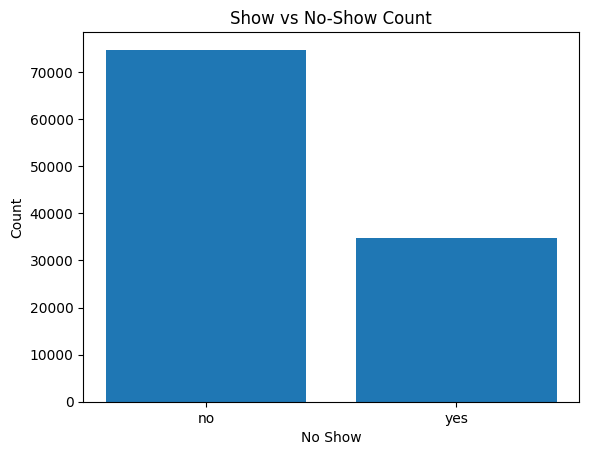

no_show
no     68.216948
yes    31.783052
Name: proportion, dtype: float64


In [3]:

counts = df['no_show'].value_counts()

plt.figure()
plt.bar(counts.index.astype(str), counts.values)
plt.title("Show vs No-Show Count")
plt.xlabel("No Show")
plt.ylabel("Count")
plt.show()

print(df['no_show'].value_counts(normalize=True) * 100)



## 5. Age vs No-Show

Purpose:
- Understand which age groups need intervention


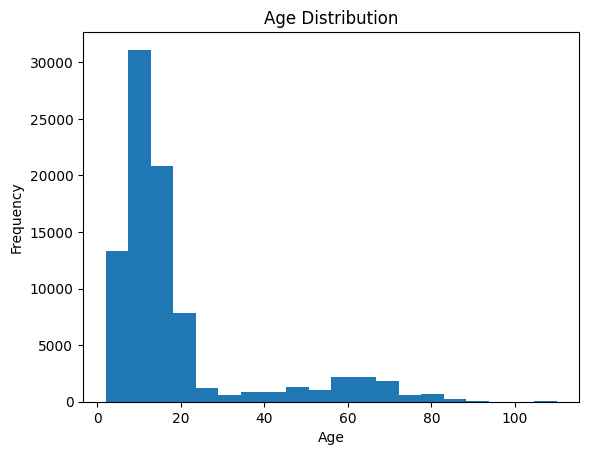

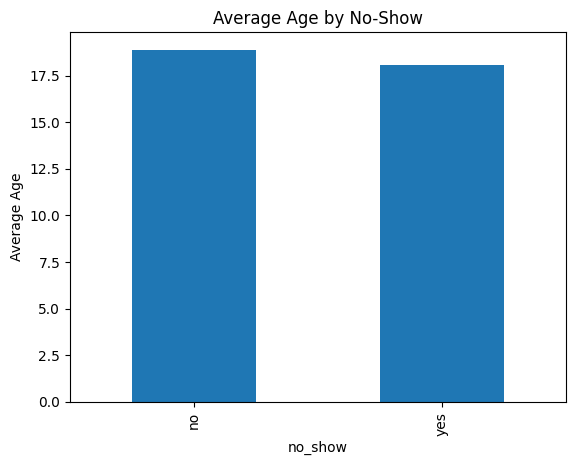

In [4]:

plt.figure()
plt.hist(df['age'].dropna(), bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df.groupby('no_show')['age'].mean().plot(kind='bar')
plt.title("Average Age by No-Show")
plt.ylabel("Average Age")
plt.show()



## 6. Specialty Impact

Business value:
- Direct input for staffing & scheduling


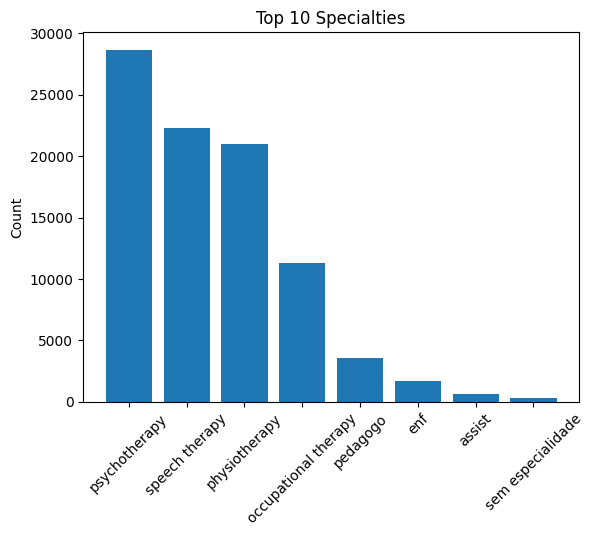

In [5]:

top = df['specialty'].value_counts().head(10)

plt.figure()
plt.bar(top.index.astype(str), top.values)
plt.title("Top 10 Specialties")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()



## 7. City / Place Analysis

Travel and accessibility influence


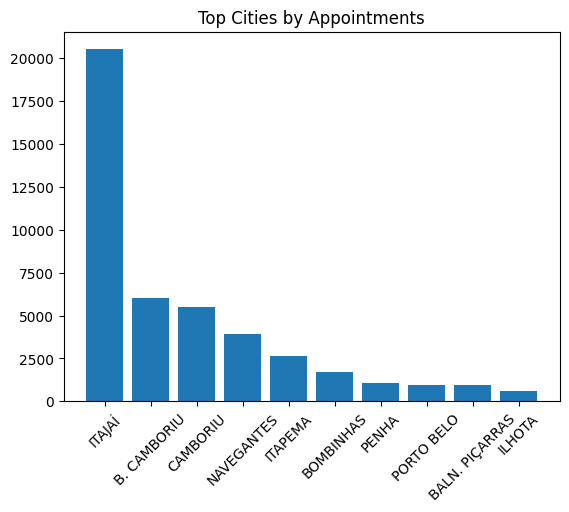

In [6]:

place = df['place'].value_counts().head(10)

plt.figure()
plt.bar(place.index.astype(str), place.values)
plt.xticks(rotation=45)
plt.title("Top Cities by Appointments")
plt.show()



## 8. Weather Impact – Using REAL Columns


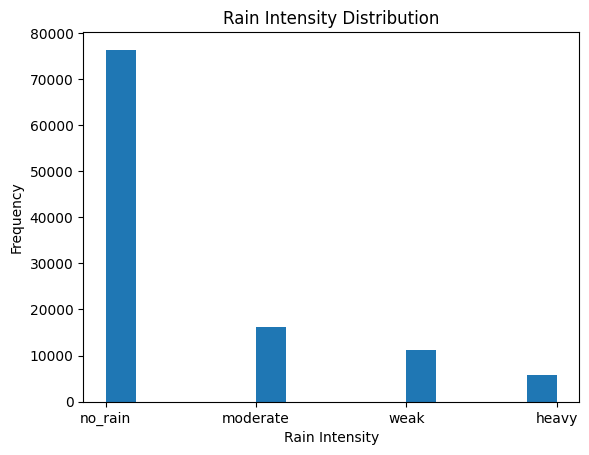

<Figure size 640x480 with 0 Axes>

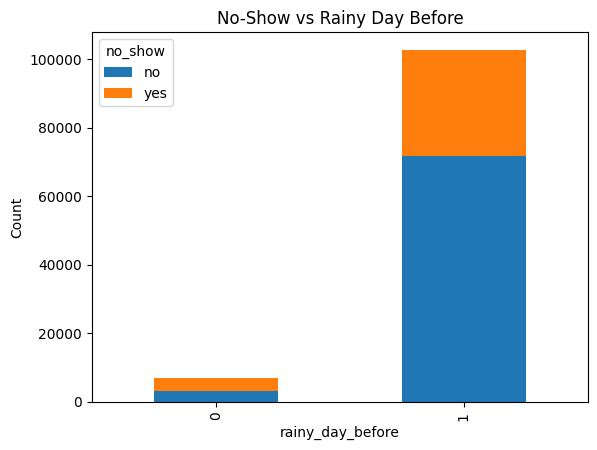

<Figure size 640x480 with 0 Axes>

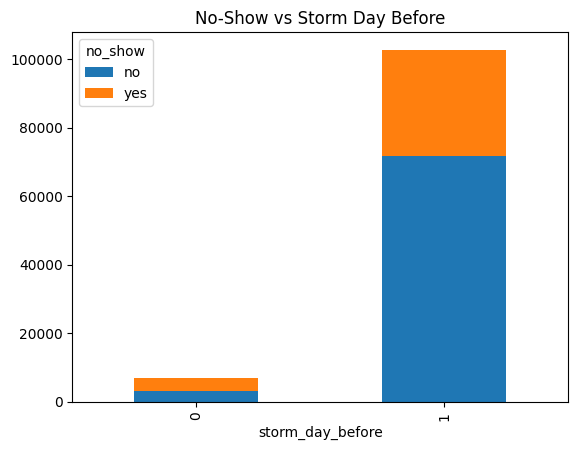

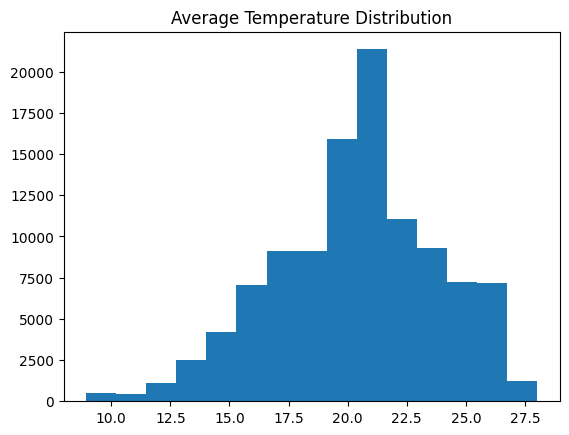

In [10]:

# Rain Intensity
if 'rain_intensity' in df.columns:
    plt.figure()
    plt.hist(df['rain_intensity'].dropna(), bins=15)
    plt.title("Rain Intensity Distribution")
    plt.xlabel("Rain Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Rainy Day Before vs No-Show
if 'rainy_day_before' in df.columns:
    cross = pd.crosstab(df['rainy_day_before'], df['no_show'])

    plt.figure()
    cross.plot(kind='bar', stacked=True)
    plt.title("No-Show vs Rainy Day Before")
    plt.ylabel("Count")
    plt.show()

# Storm Day Impact
if 'storm_day_before' in df.columns:
    cross = pd.crosstab(df['storm_day_before'], df['no_show'])

    plt.figure()
    cross.plot(kind='bar', stacked=True)
    plt.title("No-Show vs Storm Day Before")
    plt.show()

# Temperature
if 'average_temp_day' in df.columns:
    plt.figure()
    plt.hist(df['average_temp_day'].dropna(), bins=15)
    plt.title("Average Temperature Distribution")
    plt.show()



## 9. Temporal Patterns


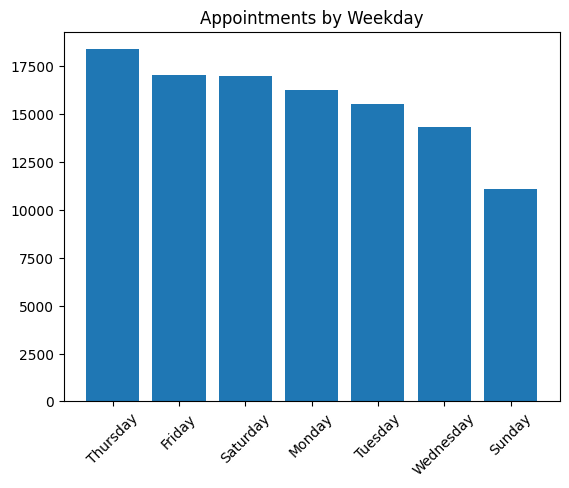

In [8]:

if 'appointment_date_continuous' in df.columns:
    df['appointment_date_continuous'] = pd.to_datetime(df['appointment_date_continuous'])
    df['weekday'] = df['appointment_date_continuous'].dt.day_name()

    w = df['weekday'].value_counts()

    plt.figure()
    plt.bar(w.index.astype(str), w.values)
    plt.xticks(rotation=45)
    plt.title("Appointments by Weekday")
    plt.show()



## 10. Interview Insights

Say this in viva:

- Weather variables available were derived indicators, not raw 'rain'  
- Rainy day before & storm indicators better capture behavior  
- Evidence supports creating:
  - weather risk feature  
  - weekday feature  
  - specialty encoding  
  - age grouping



## 11. Next Step

Proceed to:
- Missing value treatment  
- Encoding  
- Feature engineering  
- SMOTE pipeline
